 NLP Course Project ("& Project Work" ?) - Identification of Human Values behind Arguments

Authors:

*   Fabian Vincenzi fabian.vincenzi@studio.unibo.it
*   Davide Perozzi davide.perozzi@studio.unibo.it
*   Martina Ianaro martina.ianaro@studio.unibo.it




## Download data

In [ ]:
!pip install datasets
!pip install transformers

# download data
!wget https://zenodo.org/record/7503506/files/arguments-training.tsv
!wget https://zenodo.org/record/7503506/files/labels-training.tsv
!wget https://zenodo.org/record/7503506/files/arguments-validation.tsv
!wget https://zenodo.org/record/7503506/files/labels-validation.tsv
!wget https://zenodo.org/record/7503506/files/arguments-test.tsv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 113.2 MB/s eta 0:00:00
--2023-02-06 17:24:12--  https://zenodo.org/record/7503506/files/arguments-trai

In [ ]:
import pandas as pd
from datasets import Dataset

# Import the .tsv file
# train
X_train = pd.read_csv('arguments-training.tsv', delimiter='\t')
y_train = pd.read_csv('labels-training.tsv', delimiter='\t')

# val
X_val = pd.read_csv('arguments-validation.tsv', delimiter='\t')
y_val = pd.read_csv('labels-validation.tsv', delimiter='\t')

# test
X_test = pd.read_csv('arguments-test.tsv', delimiter='\t')
# test labels not available

## Preprocessing

In [ ]:
# X_train
X_train.drop(columns=["Argument ID"], inplace=True)
X_train.columns = X_train.columns.str.lower()
X_train = X_train.applymap(str.lower)

# X_val
X_val.drop(columns=["Argument ID"], inplace=True)
X_val.columns = X_val.columns.str.lower()
X_val = X_val.applymap(str.lower)

# X_test 
X_test.drop(columns=["Argument ID"], inplace=True)
X_test.columns = X_test.columns.str.lower()
X_test = X_test.applymap(str.lower)

# y_train
y_train.drop(columns=["Argument ID"], inplace=True)
y_train.columns = y_train.columns.str.lower()

# y_val
y_val.drop(columns=["Argument ID"], inplace=True)
y_val.columns = y_val.columns.str.lower()

In [ ]:
X_train.head()

,conclusion,stance,premise
0,we should ban human cloning,in favor of,we should ban human cloning as it will only ca...
1,we should ban fast food,in favor of,fast food should be banned because it is reall...
2,we should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...
3,we should abolish capital punishment,against,capital punishment is sometimes the only optio...
4,we should ban factory farming,against,factory farming allows for the production of c...


In [ ]:
y_train.head()

,self-direction: thought,self-direction: action,stimulation,hedonism,achievement,power: dominance,power: resources,face,security: personal,security: societal,tradition,conformity: rules,conformity: interpersonal,humility,benevolence: caring,benevolence: dependability,universalism: concern,universalism: nature,universalism: tolerance,universalism: objectivity
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


19


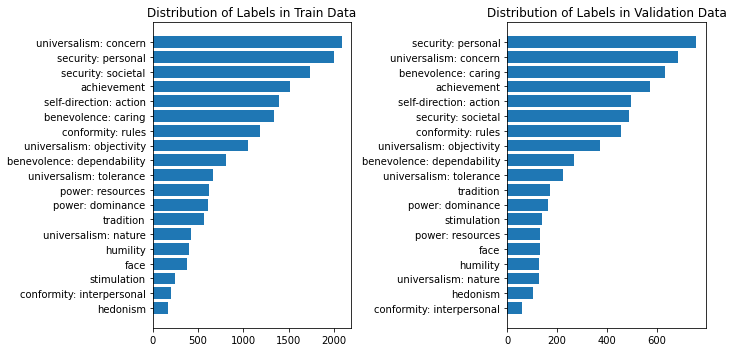

In [ ]:
import matplotlib.pyplot as plt

LABEL_COLUMNS = y_train.columns.tolist()[1:]
print(len(LABEL_COLUMNS))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Distribution of labels in train data
ax[0].barh(y_train[LABEL_COLUMNS].sum().sort_values().index, y_train[LABEL_COLUMNS].sum().sort_values().values)
ax[0].set_title("Distribution of Labels in Train Data")

# Distribution of labels in validation data
ax[1].barh(y_val[LABEL_COLUMNS].sum().sort_values().index, y_val[LABEL_COLUMNS].sum().sort_values().values)
ax[1].set_title("Distribution of Labels in Validation Data")

plt.tight_layout()
plt.show()

In [ ]:
X_train['text'] = X_train["premise"] + ' ' + X_train["stance"] + ' ' + X_train["conclusion"]
X_val['text'] = X_val["premise"] + ' ' + X_val["stance"] + ' ' + X_val["conclusion"]
X_test['text'] = X_test["premise"] + ' ' + X_test["stance"] + ' ' + X_test["conclusion"]

In [ ]:
X_train.head()

,conclusion,stance,premise,text
0,we should ban human cloning,in favor of,we should ban human cloning as it will only ca...,we should ban human cloning as it will only ca...
1,we should ban fast food,in favor of,fast food should be banned because it is reall...,fast food should be banned because it is reall...
2,we should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,sometimes economic sanctions are the only thin...
3,we should abolish capital punishment,against,capital punishment is sometimes the only optio...,capital punishment is sometimes the only optio...
4,we should ban factory farming,against,factory farming allows for the production of c...,factory farming allows for the production of c...


In [ ]:
X_train["labels"] = [y_train.iloc[n].values for n in range(len(y_train))]
X_val["labels"] = [y_val.iloc[n].values for n in range(len(y_val))]

# X_test["labels"] = [y_test.iloc[n].values for n in range(len(y_test))]

In [ ]:
X_train[["text","labels"]].head()

,text,labels
0,we should ban human cloning as it will only ca...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,fast food should be banned because it is reall...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,sometimes economic sanctions are the only thin...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,capital punishment is sometimes the only optio...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
4,factory farming allows for the production of c...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ..."


## Tokenize and encode input 

In [ ]:
import torch
from transformers import BertTokenizer

batch_size = 64

# Create the tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
def tokenize_and_encode(df):
    max_length = 256
    
    encoding = tokenizer.batch_encode_plus(df["text"], max_length=max_length, padding=True, truncation=True)
    
    input_ids = torch.tensor(encoding['input_ids'])
    attention_mask = torch.tensor(encoding['attention_mask'])

    return input_ids, attention_mask

In [ ]:
# Tokenize and encode
# train
input_ids, attention_mask = tokenize_and_encode(X_train)
train_inputs = torch.tensor(input_ids)
train_labels = torch.tensor(list(X_train["labels"].values))
train_mask = torch.tensor(attention_mask)

# val
input_ids_val, attention_mask_val = tokenize_and_encode(X_val)
val_inputs = torch.tensor(input_ids_val)
val_labels = torch.tensor(list(X_val["labels"].values))
val_mask = torch.tensor(attention_mask_val)

<ipython-input-13-f81cf6d13e16>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_inputs = torch.tensor(input_ids)
<ipython-input-13-f81cf6d13e16>:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  train_labels = torch.tensor(list(X_train["labels"].values))
<ipython-input-13-f81cf6d13e16>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_mask = torch.tensor(attention_mask)
<ipython-input-13-f81cf6d13e16>:10: UserWarning: To copy construct from a tensor, it is recommende

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

train_data = TensorDataset(train_inputs, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_inputs, val_mask, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

## BERT model




In [ ]:
import numpy as np
import os
from torch import nn
from tqdm import tqdm,trange
from torch.optim import AdamW
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertForSequenceClassification, BertTokenizer
from sklearn.metrics import f1_score

### Training

In [ ]:
# load the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', problem_type="multi_label_classification", num_labels=20)
model.to('cuda:0')

# config
model.config.eos_token_id = tokenizer.sep_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.max_length = 516
model.config.min_length = 20
model.config.no_repeat_ngram_size = 3
model.config.early_stopping = True
model.config.num_beams = 4

param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
    'weight_decay_rate': 0.01},
    {'params': [p for n,p in param_optimizer if any(nd in n for nd in no_decay)],
    'weigth_decay_rate': 0.0}
]

# define the loss function and optimizer
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = AdamW(optimizer_grouped_parameters, lr=6e-6)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# Number of training epochs
epochs = 50

In [ ]:
# For Storing our loss and accuracy for plotting
val_f1_score_history, training_loss_history = [],[]

for _ in trange(epochs, desc="Training"):
  # training
  model.train()
  tot_loss = 0
  # Tracking variables
  tr_loss = 0 #running loss
  nb_tr_steps = 0

  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    model.to("cuda:0")
    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    # Perform a forward pass on the GPU
    outputs = model(ids, attention_mask=mask)

    logits = outputs[0]
    
    loss = criterion(logits,labels.type_as(logits)) #convert labels to float for calculation
    
    # Perform backpropagation and optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_steps += 1

  training_loss_history.append(tr_loss/nb_tr_steps)

  ###############################################################################

  # Validation
  model.eval()
  val_f1_score = 0

  # Predict
  for i, batch in enumerate(val_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    with torch.no_grad():
      # Forward pass
      outputs = model(ids, attention_mask=mask)
      pred_logits = outputs[0]
      pred_labels = torch.sigmoid(pred_logits)
      pred_logits = pred_logits.cpu().numpy()
      pred_labels = pred_labels.cpu().numpy()
      labels = labels.cpu().numpy()

    # Calculate F1 score and Accuracy
    threshold = 0.2
    pred_bools = [pl > threshold for pl in pred_labels]
    true_bools = [tl == 1 for tl in labels]
    val_f1_score += f1_score(true_bools,pred_bools,average='micro')
  
  val_f1_score_history.append( val_f1_score/len(val_dataloader) )

Training: 100%|██████████| 50/50 [32:25<00:00, 38.90s/it]


Text(0.5, 1.0, 'Training Loss and F1 score over Epochs')

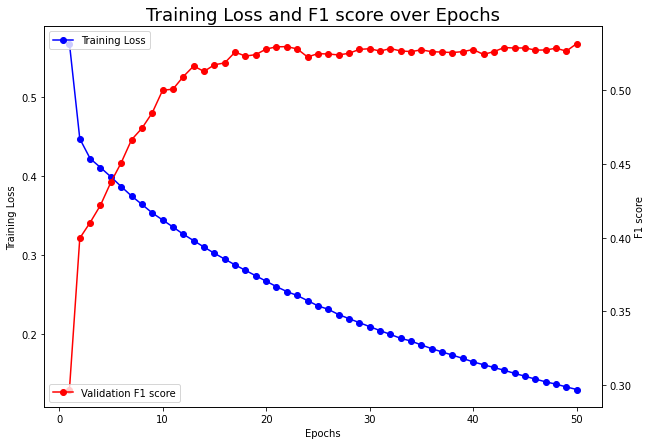

In [ ]:
num_epochs = np.arange(1, epochs+1)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(num_epochs, np.array(training_loss_history), 'bo-', label="Training Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Training Loss")
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(num_epochs, np.array(val_f1_score_history), 'ro-', label="Validation F1 score")
ax2.set_ylabel("F1 score")
ax2.legend(loc='lower left')

ax.set_title("Training Loss and F1 score over Epochs",fontsize=18)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_bools,pred_bools,target_names=y_train.columns, zero_division=0))

                            precision    recall  f1-score   support

   self-direction: thought       0.33      0.40      0.36         5
    self-direction: action       0.33      0.55      0.41        11
               stimulation       0.00      0.00      0.00         0
                  hedonism       0.00      0.00      0.00         0
               achievement       0.24      0.57      0.33         7
          power: dominance       0.29      0.62      0.40         8
          power: resources       0.17      0.50      0.25         2
                      face       0.00      0.00      0.00         4
        security: personal       0.23      0.60      0.33        10
        security: societal       0.53      1.00      0.69        20
                 tradition       0.00      0.00      0.00         3
         conformity: rules       0.67      0.56      0.61        18
 conformity: interpersonal       0.00      0.00      0.00         0
                  humility       0.00      0.00

In [ ]:
#to access drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the fine-tuned model
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/model_bert")

### Evaluation

In [ ]:
import torch
import torch.nn as nn
import transformers
from transformers import BertForSequenceClassification

# Load the state dict from the saved file
state_dict = torch.load("/content/drive/MyDrive/Colab Notebooks/model_bert")

# Initialize the model
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', problem_type="multi_label_classification", num_labels=20)
bert_model.to("cuda:0")

# Load the state dict into the model
bert_model.load_state_dict(state_dict)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

<All keys matched successfully>

#### Evaluation- sigmoid

100%|██████████| 18/18 [05:31<00:00, 18.44s/it]


Best validation F1 score:  0.5323280796303314
Best threshold:  0.25


Text(0.5, 1.0, 'F1 score over thresholds')

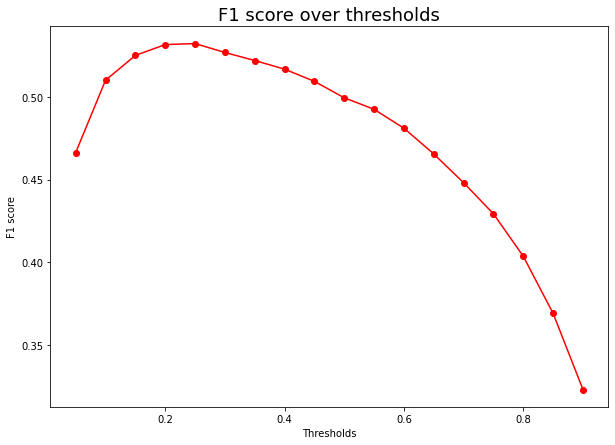

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
# Evaluation
bert_model.eval()

# Initialize the best F1 score and the corresponding threshold
best_f1_score = 0
best_threshold = 0
val_f1_score_history = []

thresholds = np.arange(0.05, 0.95, 0.05)
# Loop over a range of threshold values
for threshold in tqdm(thresholds):
  val_f1_score = 0

  # Predict
  for i, batch in enumerate(val_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    with torch.no_grad():
      # Forward pass
      outputs = bert_model(ids, attention_mask=mask)
      pred_logits = outputs[0]
      pred_labels = torch.sigmoid(pred_logits)
      pred_logits = pred_logits.cpu().numpy()
      pred_labels = pred_labels.cpu().numpy()
      labels = labels.cpu().numpy()

    # Calculate F1 score
    pred_bools = [pl > threshold for pl in pred_labels]
    true_bools = [tl == 1 for tl in labels]
    val_f1_score += f1_score(true_bools,pred_bools,average='micro')
    
  val_f1_score = val_f1_score/len(val_dataloader)
  
  # Update the best F1 score and corresponding threshold if necessary
  if val_f1_score > best_f1_score:
    best_f1_score = val_f1_score
    best_threshold = threshold

  val_f1_score_history.append(val_f1_score)

print('\nBest validation F1 score: ', best_f1_score)   
print('Best threshold: ', best_threshold )

fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(thresholds, np.array(val_f1_score_history),'ro-' ,label="F1 score")
ax.set_xlabel("Thresholds")
ax.set_ylabel("F1 score")
ax.set_title("F1 score over thresholds",fontsize=18)

#### Evaluation- softmax

100%|██████████| 20/20 [06:08<00:00, 18.45s/it]


Best validation F1 score:  0.5174345067361681
Best threshold:  0.01


Text(0.5, 1.0, 'F1 score over thresholds')

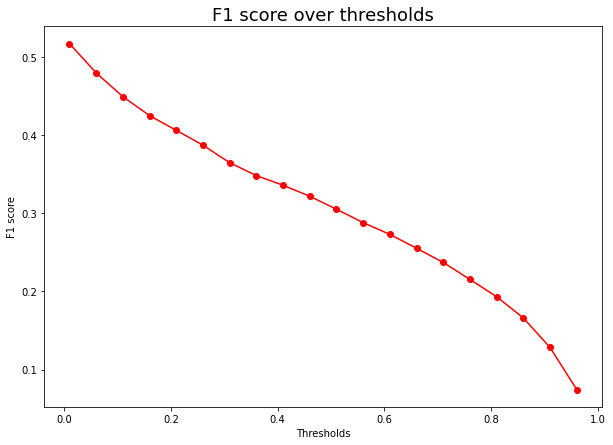

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
# Evaluation
bert_model.eval()

# Initialize the best F1 score and the corresponding threshold
best_f1_score = 0
best_threshold = 0
val_f1_score_history = []

thresholds = np.arange(0.01, 1, 0.05)
# Loop over a range of threshold values
for threshold in tqdm(thresholds):
  val_f1_score = 0

  # Predict
  for i, batch in enumerate(val_dataloader):
    ids, mask, labels = batch
    labels = labels.float()

    ids = ids.to("cuda:0")
    mask = mask.to("cuda:0")
    labels = labels.to("cuda:0")

    with torch.no_grad():
      # Forward pass
      outputs = bert_model(ids, attention_mask=mask)
      pred_logits = outputs[0]
      pred_labels = torch.softmax(pred_logits, dim=1)
      pred_logits = pred_logits.cpu().numpy()
      pred_labels = pred_labels.cpu().numpy()
      labels = labels.cpu().numpy()

    # Calculate F1 score
    pred_bools = [pl > threshold for pl in pred_labels]
    true_bools = [tl == 1 for tl in labels]
    val_f1_score += f1_score(true_bools,pred_bools,average='micro')
    
  val_f1_score = val_f1_score/len(val_dataloader)
  
  # Update the best F1 score and corresponding threshold if necessary
  if val_f1_score > best_f1_score:
    best_f1_score = val_f1_score
    best_threshold = threshold

  val_f1_score_history.append(val_f1_score)

print('\nBest validation F1 score: ', best_f1_score)   
print('Best threshold: ', best_threshold )

fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(thresholds, np.array(val_f1_score_history),'ro-' ,label="F1 score")
ax.set_xlabel("Thresholds")
ax.set_ylabel("F1 score")
ax.set_title("F1 score over thresholds",fontsize=18)